# TODO: Task 2 - Approximating linear vector fields

In [22]:
# All imports (TODO: Remove the ones that you don't use and add appropriate packages if necessary)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist
import utils
from matplotlib.gridspec import GridSpec
%reload_ext autoreload
%autoreload 2

# Load data
x0 = np.loadtxt('../../data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../../data/linear_vectorfield_data_x1.txt')

### TODO: Part 1 - Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$
First lets visualize the shift from x0 to x1

In [3]:
# We compute the vector field
delta_T = 0.1
v = (x1-x0)/delta_T

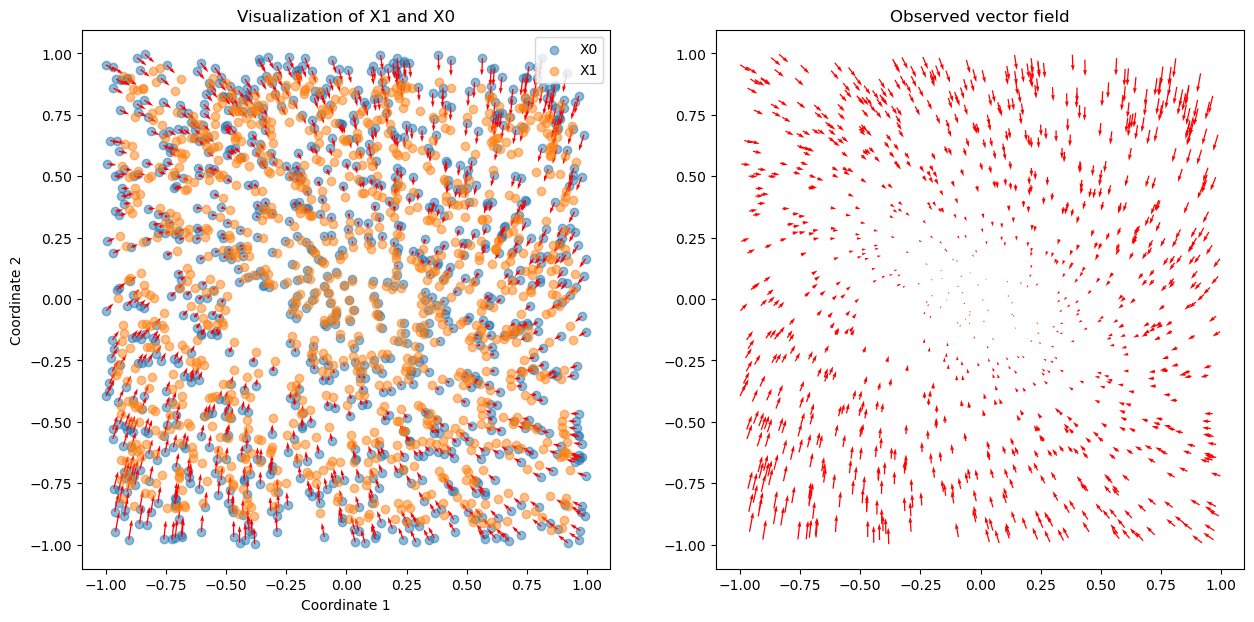

In [25]:
# Plot x1 and x0 as well as the vector field at time t=0
fig, ax = plt.subplots(1,2, figsize =(15,7))
ax[0].scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5)
ax[0].quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')
ax[0].scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5)
ax[0].set_xlabel("Coordinate 1")
ax[0].set_ylabel("Coordinate 2")
ax[0].set_title("Visualization of X1 and X0")
ax[0].legend()
ax[1].quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')
ax[1].set_title('Observed vector field')
plt.savefig('../../plot/visualization_linear_x0_x1.png')

From this first graph we can see that points from x0 are all shifted towards the center of the plane to reach x1 after delta T. The vector field seems linear, all the vectors point towards the origin, and are smaller near the origin (should reach 0 in (0,0) as a linear function should).

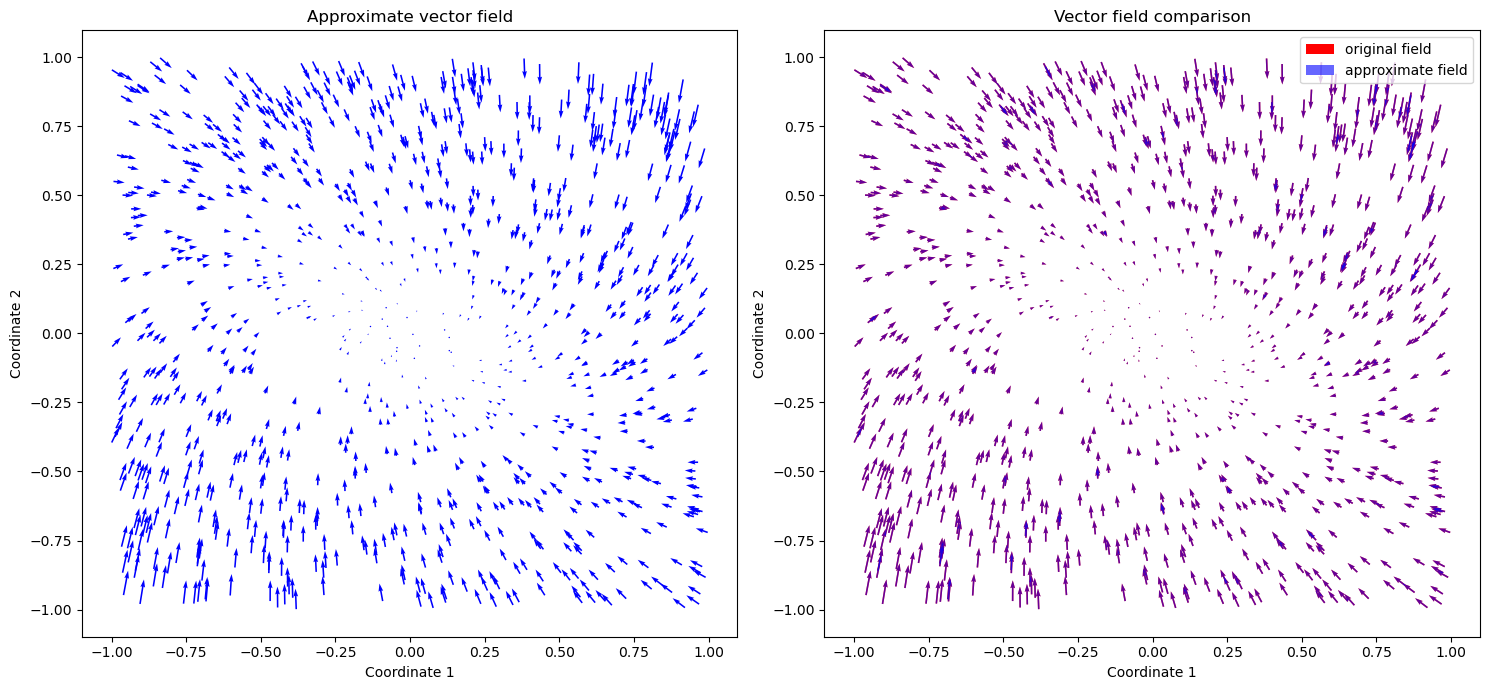

In [31]:
# we approximate the vector field as a linear function of x0, and compare it to original vector field
#approx = utils.transform(x0, utils.least_squares(x0,v))
linear_approx_field = utils.linear_fit_transform(x0,v)[0]

fig, ax = plt.subplots(1,2, figsize =(15,7))
ax[0].quiver(x0[:,0], x0[:,1], linear_approx_field[:,0], linear_approx_field[:,1], color= 'b')
ax[0].set_xlabel('Coordinate 1')
ax[0].set_ylabel('Coordinate 2')
ax[0].set_title('Approximate vector field')
ax[1].quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
ax[1].quiver(x0[:,0], x0[:,1], linear_approx_field[:,0], linear_approx_field[:,1], color= 'b', alpha= 0.6, label ='approximate field')
ax[1].set_title('Vector field comparison')
ax[1].set_xlabel('Coordinate 1')
ax[1].set_ylabel('Coordinate 2')
ax[1].legend()
plt.tight_layout()
plt.savefig('../../plot/linear_field_comparison.png')
plt.show()

In [28]:
utils.mean_squared_error(v,linear_approx_field)

1.0532185336209073e-14

As we can see from the plots and the extremely low error (10e-14), the vector field was approximated almost perfectly. Careful with overfitting tho!

### TODO: Part 2 - Solve the linear system and compute the mean squared error

In [9]:
A_estim = utils.least_squares(x0,v)[0]

In [20]:
# derivative of the flow with respect to time, to be integrated using solve_ivp
def f(t, y):
    y = y.reshape(-1,2)
    return np.dot(y, A_estim).flatten()

# Using solve_ivp wrapper x1_estim, iterate the solver over all the rows of x0
#approx_x1 = utils.x1_estim(f,x0, delta_T)
approx_x1 = solve_ivp(f, [0, delta_T], x0.flatten(), t_eval = [delta_T]).y.reshape(-1,2)
utils.mean_squared_error(x1, approx_x1)

9.957557044904495e-06

MSE is quite small (10e-05), even though much bigger than with respect to the vector field. Error has propagated when integrating the vector field with respect to time. However this is still an interesting result, and our linear model managed to predict the future state of the system pretty accurately!

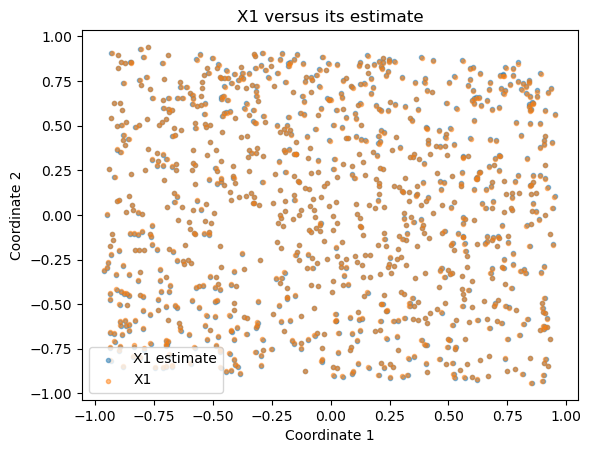

In [32]:
plt.scatter(approx_x1[:,0],approx_x1[:,1], label = 'X1 estimate', alpha= 0.5, marker='.')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5, marker= '.')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.title('X1 versus its estimate')
plt.legend()
plt.savefig('../../plot/linear_estimate_x1.png')

###  TODO: Part 3 - Visualize trajectories and phase portrait 

We choose T_end = 100, and initial point (10,10). We then simply solve the linear sytem we just built with Python solver *solve_ivp*

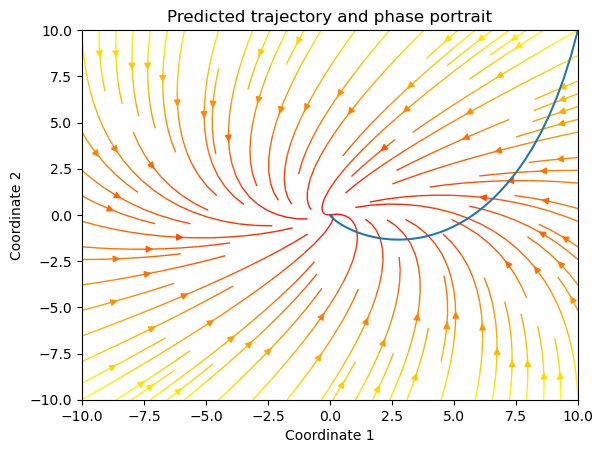

In [34]:
T_end = 100
#evaluate system every 0.1 timestep to get precise trajectory
t_eval = np.arange(0,100.1,delta_T)
solve = solve_ivp(f, [0,T_end], np.array([10,10]), t_eval= t_eval)
trajectory = solve.y.T

#building phase portrait
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
DX = A_estim[0,0]*X + A_estim[0,1]*Y
DY = A_estim[1,0]*X + A_estim[1,1]*Y

#plot phase portrait
plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Phase portrait")

#plot the trajectory
plt.plot(trajectory[:,0],trajectory[:,1])
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Predicted trajectory and phase portrait")

plt.savefig('../../plot/trajectory_linear_field.png')

As we could have guessed from initial vector field computed previously, the system converges towards the origin. The trajectory confirms it; event though the starting point is quite far outside the initial data, it still gets attracted to the center of the plane.

### ANNEX GRAPHS

Text(0, 0.5, 'Coordinate 2')

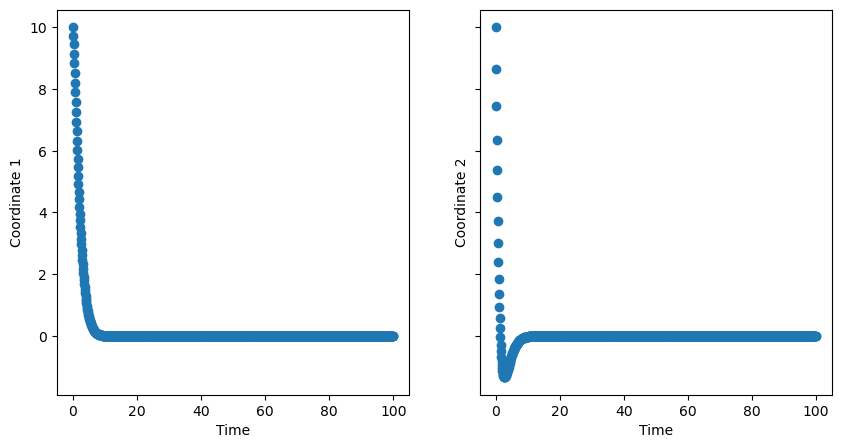

In [35]:
fig,ax = plt.subplots(1,2,figsize = (10,5), sharex=True, sharey=True)

ax[0].scatter(solve.t,trajectory[:,0])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Coordinate 1")
#ax[0].xlim(0,100)
#ax[0].ylim(-10,10)

ax[1].scatter(solve.t,trajectory[:,1])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Coordinate 2")
#ax[1].xlim(0,100)
#ax[1].ylim(-10,10)

Text(0, 0.5, 'Speed')

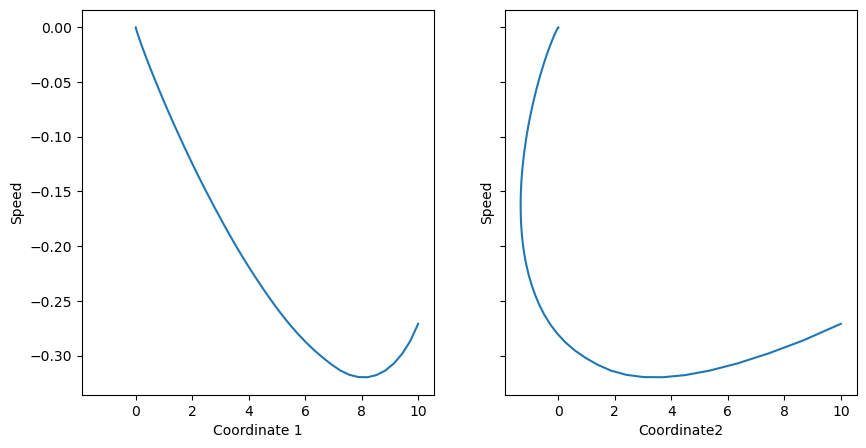

In [36]:
#coordinaates speed
speeds = [trajectory[i+1:i+2,:]-trajectory[i:i+1,:] for i in range(len(trajectory))]
speeds_stack = speeds[0]
for i in range(len(speeds)-1):
    speeds_stack = np.vstack((speeds_stack, speeds[i+1]))
fig,ax = plt.subplots(1,2,figsize = (10,5), sharex=True, sharey=True)

ax[0].plot(trajectory[:1000,0], speeds_stack[:,0])
ax[0].set_xlabel("Coordinate 1")
ax[0].set_ylabel("Speed")
#ax[0].xlim(0,100)
#ax[0].ylim(-10,10)

ax[1].plot(trajectory[:1000,1],speeds_stack[:,0])
ax[1].set_xlabel("Coordinate2")
ax[1].set_ylabel("Speed")
#ax[1].xlim(0,100)
#ax[1].ylim(-10,10)

NameError: name 'v_field_estim' is not defined

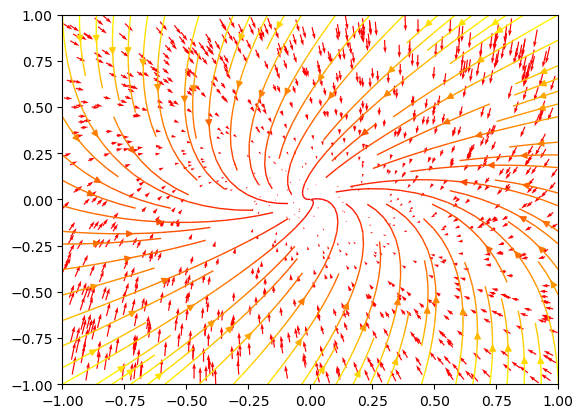

In [37]:
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
DX = A_estim[0,0]*X + A_estim[0,1]*Y
DY = A_estim[1,0]*X + A_estim[1,1]*Y

plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], v_field_estim[:,0], v_field_estim[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.title("Phase portrait")

In [ ]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
DX = A_estim[0,0]*X + A_estim[0,1]*Y
DY = A_estim[1,0]*X + A_estim[1,1]*Y

plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Phase portrait")

In [ ]:
plt.plot(trajectory[:,0],trajectory[:,1])
plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Predicted trajectory")

In [ ]:
trajectories_dict = {}
trajectories_list = []
for i in range(-10,11):
    for j in range(-10,11):

        trajectories_list.append(utils.trajectory(f, np.array([i,j]), T_end, t_eval= t_eval))
        trajectories_dict[(i,j)] = (utils.trajectory(f, np.array([i,j]), T_end, t_eval= t_eval))

In [ ]:
plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
for i in range(len(trajectories_list)):
    plt.plot(trajectories_list[i][:,0],trajectories_list[i][:,1])
    plt.xlabel("Coordinate 1")
    plt.ylabel("Coordinate 2")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.grid()
    plt.title("Predicted trajectory")

In [ ]:
plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')

plt.plot(trajectories_dict[(10,10)][:,0],trajectories_dict[(10,10)][:,1])
plt.plot(trajectories_dict[(-10,10)][:,0],trajectories_dict[(-10,10)][:,1])
plt.plot(trajectories_dict[(10,-10)][:,0],trajectories_dict[(10,-10)][:,1])
plt.plot(trajectories_dict[(-10,-10)][:,0],trajectories_dict[(-10,-10)][:,1])
plt.plot(trajectories_dict[(0,0)][:,0],trajectories_dict[(0,0)][:,1])
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Predicted trajectory")

In [ ]:
trajectories_dict[(0,0)]

In [26]:
X.shape

(1000, 1000)